<a href="https://colab.research.google.com/github/ccwu0918/yolov7-colab/blob/main/YOLOv7_with_Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

下載github yolov7 repo 

* 官方：https://github.com/WongKinYiu/yolov7.git
* Fork版本有些修改：https://github.com/taipingeric/yolov7.git

步驟1：連結到自己的雲端硬碟，後續可以直接啟用辨識

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


步驟2：將路徑移動到自己的雲端硬碟

In [2]:
import os
if os.path.exists('/content/drive/MyDrive/Colab Notebooks'):
  %cd "/content/drive/MyDrive/Colab Notebooks"
%ls -al

/content/drive/MyDrive/Colab Notebooks
total 92904
-rw------- 1 root root   629939 Nov 24 07:49  01.建立Darknet網路
-rw------- 1 root root    87622 May 26  2022 '03_09_Pivot Tables (樞紐分析表).ipynb'
-rw------- 1 root root    21223 May 26  2022 '03_10_Vectorized String Operations (向量化字串操作).ipynb'
-rw------- 1 root root    25541 May 26  2022 '03_11_Working with Time Series (使用時間序列資料).ipynb'
-rw------- 1 root root    37053 May 20  2022 '03_12_High-Performance Pandas_ eval() and query (高效率Pandas_eval()及query()).ipynb'
drwx------ 2 root root     4096 May 14  2020  109-AIdea/
drwx------ 2 root root     4096 Jun 17  2020  109-AIdea2/
-rw------- 1 root root    33630 Feb 24  2022  2022-02-24-Python.ipynb
-rw------- 1 root root    22513 May 18  2022 'advanced_outputs (1).ipynb'
-rw------- 1 root root    81860 Jul 19 12:38  advanced_outputs.ipynb
drwx------ 2 root root     4096 May 14  2020  AIMango/
-rw------- 1 root root   726437 Oct  9 08:31  Arduino_Tinyml_Workshop.ipynb
-rw------- 1 root root  4187

步驟3：載入相依性套件

In [3]:
# import dependencies
from IPython.display import display, Javascript, HTML, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import os
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

步驟4：將Yolo v7 GitHub專案檔複製到我們的雲端硬碟

In [4]:
# download github repo
if not os.path.exists('yolov7'):
  !git clone https://github.com/taipingeric/yolov7.git

In [5]:
%cd yolov7

/content/drive/MyDrive/Colab Notebooks/yolov7


In [6]:
%ls

cfg/                  Han-Chun_Wu.mp3  __pycache__/      traced_model.pt
coco128/              Han-Chun_Wu.mp4  README.md         train_aux.py
data/                 hubconf.py       requirements.txt  train.py
deploy/               inference/       runs/             utils/
detect.py             LICENSE.md       scripts/          YOLOv7.ipynb
export.py             mask-detection/  shohei.mp4        yolov7.pt
figure/               models/          test.py
Han-Chun_Wu_360p.mp4  paper/           tools/


步驟5：安裝Yolo v7 相依性套件

In [7]:
# 安裝套件 jedi, thop即可
# %pip install -r requirements.txt
%pip install jedi
%pip install thop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 23.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 下載官方參數檔

步驟6：下載官方權重檔

In [8]:
model = "yolov7.pt"
if not os.path.exists('yolov7.pt'):
  !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

步驟7： 載入相關函式庫

In [9]:
import google.colab.patches as colab #載入 google.colab 函式庫 並以colab代稱
# 因 opencv 的 顯示照片與google 的函數有衝突 故載入 google.colab 函式庫
import cv2 #載入 opencv 函式庫
import numpy #載入numpy 函式庫
import matplotlib.pyplot as plt #載入matplotlib 繪圖函式庫

## Colab 上傳檔案


步驟8： 上傳或使用現有測試照片

In [10]:
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

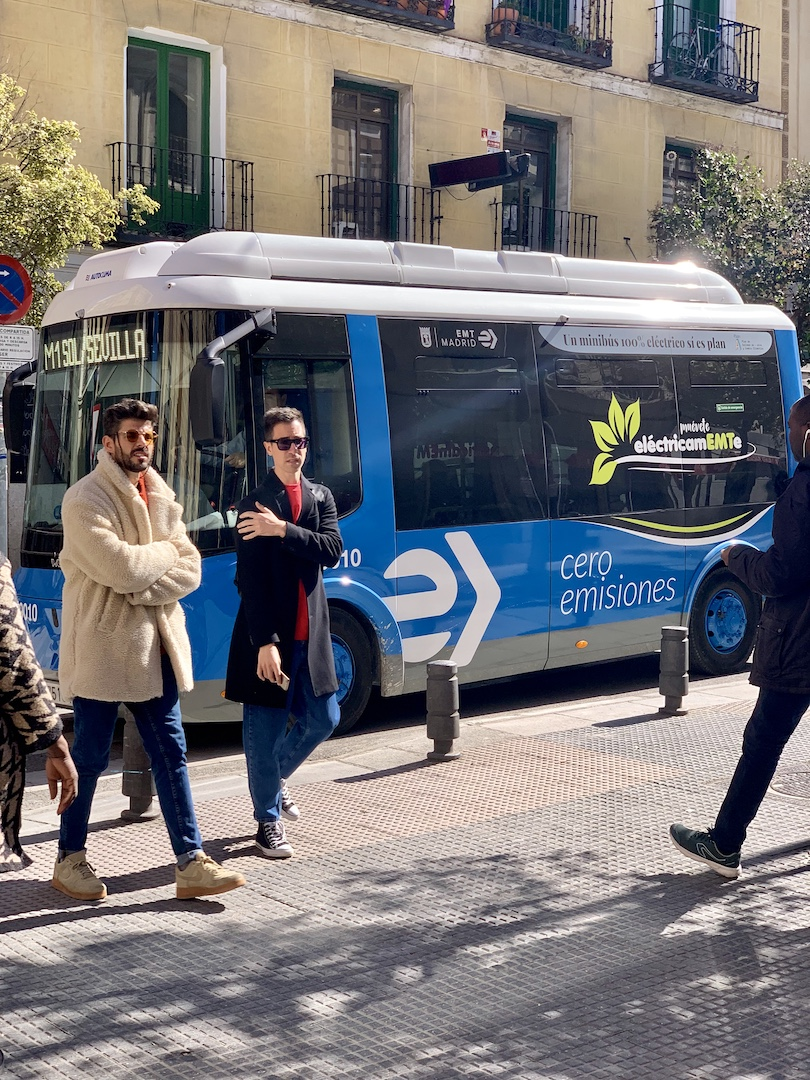

In [11]:
img_file = "inference/images/bus.jpg"
source_mat = cv2.imread(img_file) 
# 密技=>如何複製路徑=>三點點=>複製路徑=>貼上路徑
colab.cv2_imshow(source_mat)

In [12]:
!rm -i runs/detect -Rf

步驟9： Inference 驗證模型辨識結果

In [13]:
model = 'yolov7.pt'
if os.path.exists(model):
  !python detect.py --weights yolov7.pt --conf 0.5 --img-size 640 --source inference/images/bus.jpg  

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='inference/images/bus.jpg', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 2022-12-15 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
 The image with the result is saved in: runs/detect/exp

步驟10：在 runs/detect/exp*/ 查看偵測後的成果照片

In [14]:
%ls runs/detect/exp*/

bus.jpg


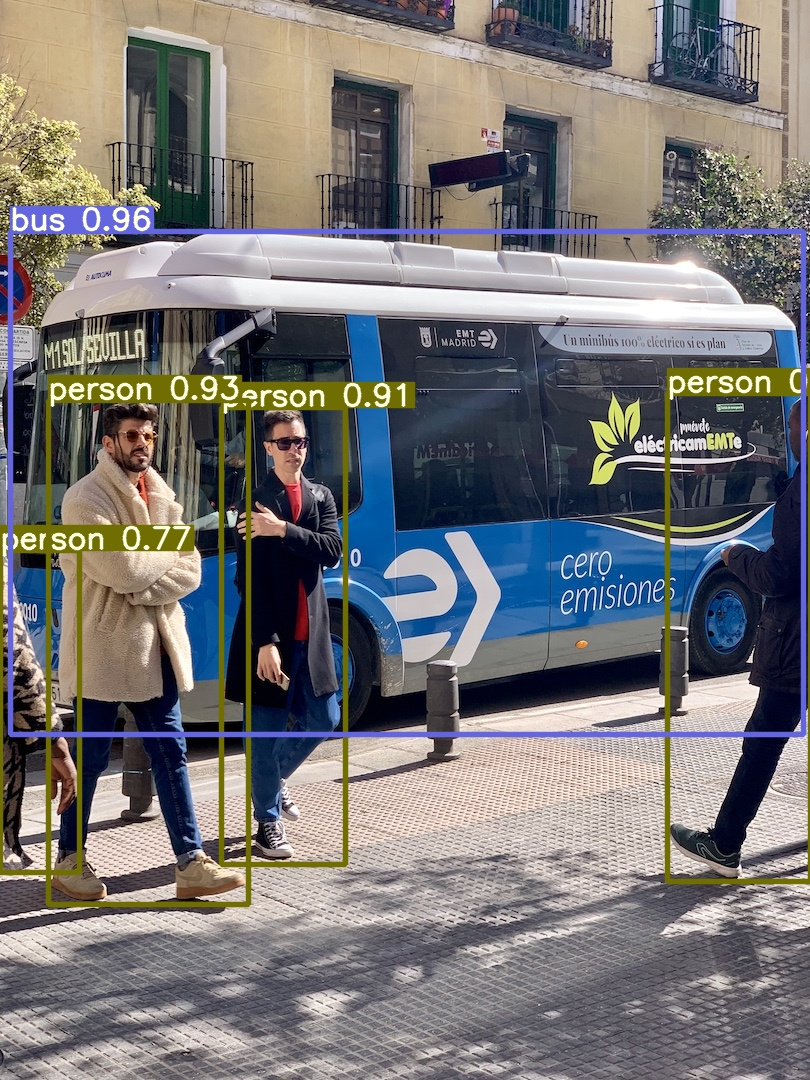

In [15]:
img_file = "runs/detect/exp/bus.jpg"
if os.path.exists(img_file):
    source_mat = cv2.imread(img_file) 
    # 密技=>如何複製路徑=>三點點=>複製路徑=>貼上路徑
    colab.cv2_imshow(source_mat)

### 用 `gradio` 打造Yolo v7 物件辨識 Web App!

In [16]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 39.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 2.3 MB 61.1 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 278 kB 73.3 MB/s 
     |████████████████████████████████| 106 kB 81.1 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 69 kB 7.6 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=4a9f5bb40b73129e8fc40562c0e3aa91d1012a447b0fe8bbf553ada91f39fb90
  Stored in direc

In [17]:
import gradio as gr

In [18]:
def classify_image(inp):
    inp = inp.reshape((-1, 256, 256, 3))
    inp = preprocess_input(inp)
    prediction = model.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(5)}

In [19]:
def detect_image(image):
  model = 'yolov7.pt'
  # Filename 
  filename = 'testImage.jpg'
    
  # Using cv2.imwrite() method 
  # Saving the image 
  cv2.imwrite(filename, image) 

  if os.path.exists(model):

    !rm -i runs/detect -Rf

    !python detect.py --weights yolov7.pt --conf 0.5 --img-size 640 --source testImage.jpg  

    img_file = "runs/detect/exp/testImage.jpg"
    if os.path.exists(img_file):
        output = cv2.imread(img_file) 
    # output = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return output

In [20]:
image = gr.Image(shape=(256, 256), label="金門藍孔雀、歐亞水獺、戴勝鳥照片")
label = gr.Label(num_top_classes=5, label="AI辨識結果")
some_text="我能辨識金門藍孔雀、歐亞水獺、戴勝鳥。找張金門藍孔雀、歐亞水獺、戴勝鳥照片來考我吧!"

我們將八哥數據庫中的圖片拿出來當作範例圖片讓使用者使用

In [21]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/yolov7/'
image_folders = ['inference/images']

In [22]:
sample_images = []
for i in range(1):
    thedir = base_dir + image_folders[i]
    for file in os.listdir(thedir):
        if file == ".git" or file == ".ipynb_checkpoints":
          continue      
        sample_images.append(image_folders[i] + '/' + file)

In [23]:
sample_images

['inference/images/bus.jpg',
 'inference/images/horses.jpg',
 'inference/images/image1.jpg',
 'inference/images/image2.jpg',
 'inference/images/image3.jpg',
 'inference/images/zidane.jpg']

最後，將所有東西組裝在一起，就大功告成了！

In [24]:
gr.Interface(fn=detect_image, 
             inputs="image", 
             outputs="image", # label
             title="AI Yolo v7 物件辨識 Web App",
             description=some_text,
             examples=sample_images, live=True).launch(share=True)

Hint: Set streaming=True for Image component to use live streaming.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ad9acc8e-4dac-43ab.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [41]:
!pip install qrcode Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.0 MB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40400 sha256=0d1da87ad8164292bdcbc47528fcbc0fa614763ef664e399daa84f6802df792e
  Stored in directory: /root/.cache/pip/wheels/35/fd/04/2768886c56207acee0d6dc6b9bd5d06dac63a810f0c0a42516
Successfully built qrcode


<class 'qrcode.image.pil.PilImage'>


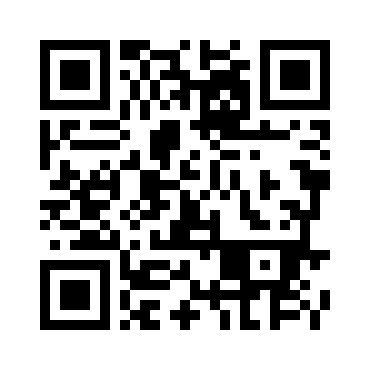

In [48]:
import qrcode

img = qrcode.make('https://ad9acc8e-4dac-43ab.gradio.live')
print(type(img))  # qrcode.image.pil.PilImage
img.save("qrcode_1.png")
gray = cv2.imread("qrcode_1.png", cv2.IMREAD_GRAYSCALE)
colab.cv2_imshow(gray)

步驟11：Inference on Video

e.g: https://www.youtube.com/watch?v=ZlAR2II5fNc

In [25]:
video_path = "/content/drive/MyDrive/Colab Notebooks/yolov7/shohei.mp4"
if not os.path.exists(video_path):
  !gdown --fuzzy 1oHVViy5V11V80aSPtX55JKJ5G4Wz1wLE

In [26]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [27]:
def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");

      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});

      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();

      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

In [28]:
video_path = "/content/drive/MyDrive/Colab Notebooks/yolov7/shohei.mp4"
if os.path.exists(video_path):
  print(video_path)
show_video(video_path)

/content/drive/MyDrive/Colab Notebooks/yolov7/shohei.mp4


步驟12： Inference 驗證模型影像辨識結果

In [29]:
model = "yolov7.pt"
if os.path.exists(model):
  !python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source shohei.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='shohei.mp4', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 2022-12-15 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/1 (1/313) /content/drive/MyDrive/Colab Notebooks/yolov7/shoh

步驟13：在 runs/detect/exp*/ 查看偵測後的成果影片

In [30]:
%ls runs/detect/exp*/

runs/detect/exp/:
bus.jpg

runs/detect/exp2/:
shohei.mp4


In [31]:
video_path = "runs/detect/exp2/shohei.mp4"
if os.path.exists(video_path):
  print(video_path)
show_video(video_path)

runs/detect/exp2/shohei.mp4


## Colab 下載檔案

步驟14：在 runs/detect/exp*/ 下載偵測後的成果影片

In [32]:
from google.colab import files
files.download(video_path)



---



## 下載Youtube影片

In [ ]:
# Pytube：下載Youtube影片
%pip install pytube 



```
如果要指定下載影片的畫質，可以透過 get_by_resolution() 方法，填入像是 720p、480p、360p、240p 等標準影像解析度格式，就能下載對應的畫質 (注意，畫質會必須取決於該影片實際大小是否支援)

```



步驟15：下載 Youtube Mp4影片及Mp3音樂檔案

In [ ]:
# 【峮峮嗨跳8分鐘炸裂應援！球場女神紅到日本：戀愛了♥︎】｜@台湾チアTV
from pytube import YouTube

def onProgress(stream, chunk, remains):
    total = stream.filesize                     # 取得完整尺寸
    percent = (total-remains) / total * 100     # 減去剩餘尺寸 ( 剩餘尺寸會抓取存取的檔案大小 )
    print(f'下載中… {percent:05.2f}', end='\r')  # 顯示進度，\r 表示不換行，在同一行更新

print('Download...')
yt = YouTube('https://youtu.be/iaFNkb1RoUc', on_progress_callback=onProgress)

print(yt.title)

# 如果想知道影片支援哪些畫質，可印出 streams.all() 來查看。
# print(yt.streams)

# 儲存為 mp4
yt.streams.filter().get_highest_resolution().download(filename='Han-Chun_Wu.mp4')
# yt.streams.filter().get_by_resolution('360p').download(filename='Han-Chun_Wu_360p.mp4')
# yt.streams.filter(subtype='mp4')[1].download("youtube")
# yt.streams.filter(subtype='mp4', res='360p', progressive=True).first().download("youtube")

# 儲存為 mp3
yt.streams.filter().get_audio_only().download(filename='Han-Chun_Wu.mp3')

# on_progress_callback 參數等於 onProgress 函式
print()
print('ok!')

In [ ]:
# video_path = "/content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4"
# if os.path.exists(video_path):
#   print(video_path)
# show_video(video_path)

In [36]:
model = "yolov7.pt"
if os.path.exists(model):
  !python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source "Han-Chun_Wu.mp4"

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='Han-Chun_Wu.mp4', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 2022-12-15 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='testImage.jpg', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 2022-12-15 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Fusing layers... 
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
RepConv.fuse_repvgg_block
RepC

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/gradio/routes.py", line 321, in run_predict
    output = await app.blocks.process_api(
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 1015, in process_api
    result = await self.call_function(fn_index, inputs, iterator, request)
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 856, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.8/dist-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.8/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.8/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-19-4dcacaa34fd1>", line 20, in detect_image
    return output
UnboundLocalError

video 1/1 (1/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (2/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (3/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (4/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (5/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (6/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (7/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (8/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (9/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (10/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (11/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (12/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: v

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/gradio/routes.py", line 321, in run_predict
    output = await app.blocks.process_api(
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 1015, in process_api
    result = await self.call_function(fn_index, inputs, iterator, request)
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 856, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.8/dist-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.8/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.8/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-19-4dcacaa34fd1>", line 8, in detect_image
    cv2.imwrite(filename, image)
cv2

video 1/1 (16567/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16568/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16569/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16570/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16571/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16572/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16573/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16574/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16575/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16576/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16577/17920) /content/drive/MyDrive/Colab Notebooks/yolov7/Han-Chun_Wu.mp4: video 1/1 (16578/17920) /content/drive/MyDr

步驟16：在 runs/detect/ 最後的實驗資料夾中。找尋並下載影片檔

In [37]:
%ls runs/detect/exp*/

testImage.jpg


In [38]:
# video_path = "runs/detect/exp3/Han-Chun_Wu.mp4"
# if os.path.exists(video_path):
#   print(video_path)
# show_video(video_path)

In [39]:
mp3_path = "Han-Chun_Wu.mp3"
from google.colab import files
files.download(mp3_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
video_path = "runs/detect/exp3/Han-Chun_Wu.mp4"
from google.colab import files
files.download(video_path)

FileNotFoundError: ignored



---



步驟17：自行錄製影片。

In [ ]:
video_path = "test.mp4"
record_video(video_path)

In [ ]:
model = "yolov7.pt"
if os.path.exists(model):
  !python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source "test.mp4"

In [ ]:
%ls runs/detect/exp*/